# **Finance: Determinants of success of crowdfunding projects.**
Data collection from the kisskissbankbank.com

#### **Packages**

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen
import time

In [2]:
from selenium import webdriver

chrome_path = r'D:\\Telecom 1e anne\\Telecom Period 1\\Jupyter\\MODS203\\Project\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
driver.get("https://www.kisskissbankbank.com/en/discover")

#### **Parsing data**

In [3]:
#function to get the html code from the requested url
def download_from_the_internet(url):
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None

##### Option 1: Get all the projects links. Iterate by project.

In [4]:
#function returns list of the tupels, where [0] – link to the project, [1] – category assigned to this project
def extract_links_from_html(html):  
    parser = BeautifulSoup(html)
#     parser = parser.find('div', attrs = {'class':'styles__StyledGrid-xsvioa-0 iBEewj kiss-BrowsingGrid'})
    parser = parser.find('div', attrs = {'class':'styles__StyledGrid-xsvioa-0'})
    return [(link.get('href'), link.find('div', attrs={'class':'k-CrowdfundingCard__subtitle__container'}).text) for link in parser.findAll('a')]

In [5]:
#functions return you list of the project links on the web-site
def get_all_projects_links(url, number):
    links = []
    for i in range(1,number):
        html = download_from_the_internet(url+'&page='+str(i))
#         print(html)
        links.extend(extract_links_from_html(html))
        time.sleep(5)
    return links

In [8]:
#Example of use with filtering
#You should checkbox the filter needed
#Copy the url and paste it in the url ⤓
url = 'https://www.kisskissbankbank.com/en/discover?categories[music]=on&categories[adventure-and-sport]=on&categories[live-performance]=on&categories[film-and-video]=on&filter=all' #url with the filters applied
links = get_all_projects_links(url, 50) #first 50 pages, you could change this number to the actual number of pages on the web-site

In [8]:
links[1][1]

'YouTubers, Comics, Video games'

In [30]:
a = links[1][0]
a = download_from_the_internet(a)
a = BeautifulSoup(a)

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="yes" data-react-helmet="true" name="mobile-web-app-capable"/><meta content="yes" data-react-helmet="true" name="apple-mobile-web-app-capable"/><meta content="KissKissBankBank" data-react-helmet="true" name="apple-mobile-web-app-title"/><meta content="#19b4fa" data-react-helmet="true" name="theme-color"/><meta content="#19b4fa" data-react-helmet="true" name="msapplication-navbutton-color"/><meta content="#19b4fa" data-react-helmet="true" name="apple-mobile-web-app-status-bar-style"/><meta content="/" data-react-helmet="true" name="msapplication-starturl"/><meta charset="utf-8" data-react-helmet="true"/><meta content="KissKissBankBank" data-react-helmet="true" property="author"/><meta content="KissKissBankBank" data-react-helmet="true" property="og:site_name"/><meta content="https://www.kisskissbankbank.com/en/projects/le-grand-goupil-de-dan-field-b48a8ed8-2008-45eb-a2b3-ded730e19c11" data-react-helmet="true" property="og:url"/><meta

In [29]:
# extract_links_from_html(a)
b = a.find('div', attrs = {'class':'styles__StyledGrid-xsvioa-0'})
print(b)

None


How it works? Example with the project **WAY - Le voyage de demain**

In [11]:
#recieve the html code of the web-page
html = download_from_the_internet('https://www.kisskissbankbank.com/en/projects/way-le-voyage-de-demain')
html

'<!DOCTYPE html>\n<html lang=\'en\'>\n<head>\n<meta data-react-helmet="true" name="mobile-web-app-capable" content="yes"/><meta data-react-helmet="true" name="apple-mobile-web-app-capable" content="yes"/><meta data-react-helmet="true" name="apple-mobile-web-app-title" content="KissKissBankBank"/><meta data-react-helmet="true" name="theme-color" content="#19b4fa"/><meta data-react-helmet="true" name="msapplication-navbutton-color" content="#19b4fa"/><meta data-react-helmet="true" name="apple-mobile-web-app-status-bar-style" content="#19b4fa"/><meta data-react-helmet="true" name="msapplication-starturl" content="/"/><meta data-react-helmet="true" charset="utf-8"/><meta data-react-helmet="true" property="author" content="KissKissBankBank"/><meta data-react-helmet="true" property="og:site_name" content="KissKissBankBank"/><meta data-react-helmet="true" property="og:url" content="https://www.kisskissbankbank.com/en/projects/way-le-voyage-de-demain"/><meta data-react-helmet="true" property="

In [12]:
soup = BeautifulSoup(html)

We want to get title. title is under the div class 'k-Grid' with tag h1. To find exctly this tag with the title we will also give the attribute to the find function. The unique attribute for this h1 tag is data-test-id which is equal to project-title.

```
title = soup.find('h1', attrs ={'data-test-id':'project-title'}).text
```

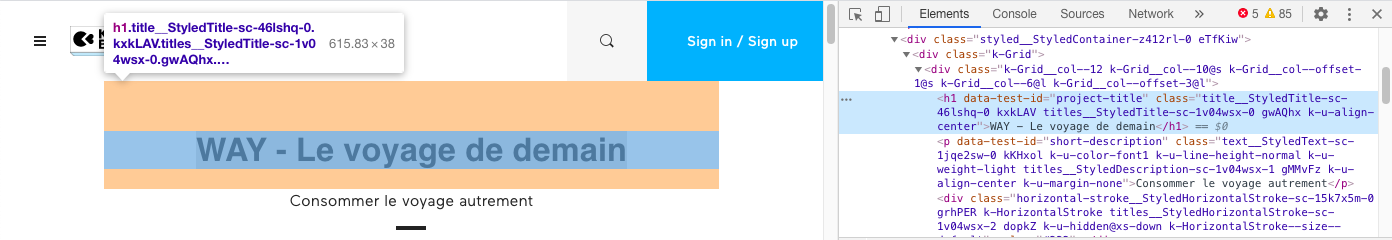

In [13]:
title = soup.find('h1', attrs ={'data-test-id':'project-title'}).text
title

'WAY - Le voyage de demain'

So now we need information about the backers, target and funded amount of money. To do so, first we need to find out which tags containe this data.


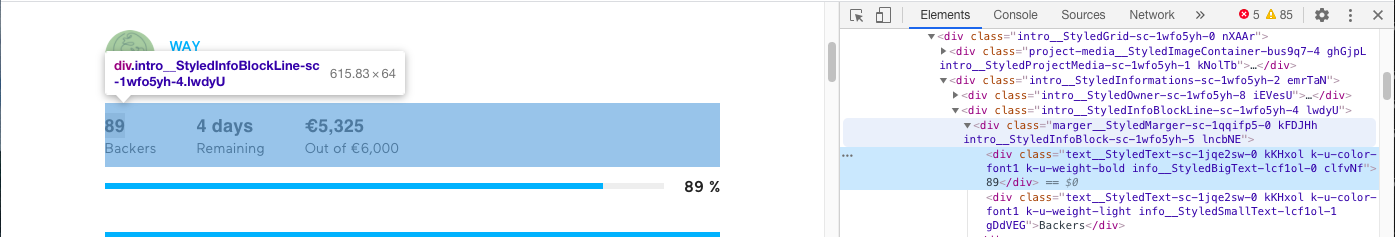

As we see, main container consists of 3 main containers (yellow) with required info. But ech container also consists of 2 more containers (blue).


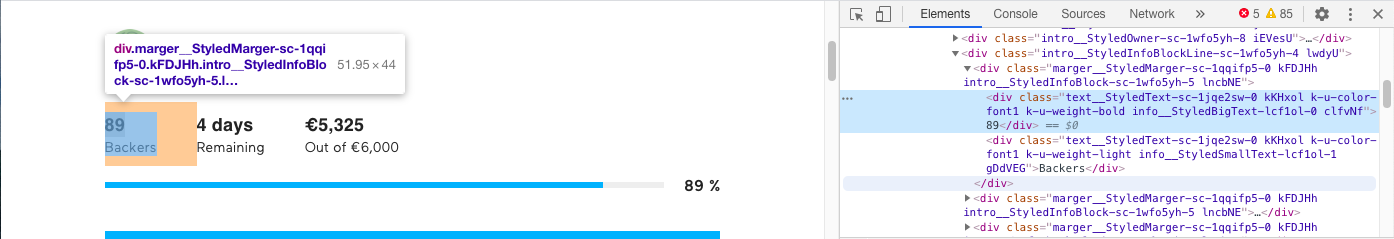

That's why, first we need to find all main container (yellow ones).
```
infos = soup.find_all('div', attrs = {'class':'marger__StyledMarger-sc-1qqifp5-0 kFDJHh intro__StyledInfoBlock-sc-1wfo5yh-5 lncbNE'})
```

Then in each container find container with the first line and container with the second line. Sometimes info about project consists only of number of backers and target and funded money,but sometimes it's also consists of days remaining to the close date of the project. 

```
for i in infos:
      if len(infos) == 2:
        funded = re.sub("[^0-9]", "",infos[1].find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-weight-bold info__StyledBigText-lcf1ol-0 clfvNf'}).text)
        target = re.sub("[^0-9]", "",infos[1].find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-weight-light info__StyledSmallText-lcf1ol-1 gDdVEG'}).text)
        backers = infos[0].find('div').text
      else:
        funded = re.sub("[^0-9]", "",infos[2].find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-weight-bold info__StyledBigText-lcf1ol-0 clfvNf'}).text)
        target = re.sub("[^0-9]", "",infos[2].find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-weight-light info__StyledSmallText-lcf1ol-1 gDdVEG'}).text)
        backers = infos[0].find('div').text
```



In a similar vein you could go through the whole function to understand how it works.

In [31]:
#function to create a list of projects for future dataframe 
def extract_data_from_html(html, category):
    soup = BeautifulSoup(html)
    title = soup.find('h1', attrs ={'data-test-id':'project-title'}).text
    infos = soup.find_all('div', attrs = {'class':'marger__StyledMarger-sc-1qqifp5-0 kFDJHh intro__StyledInfoBlock-sc-1wfo5yh-5 lncbNE'})
    '''
        Here we get the data about number of backers, amount of funded and target money.
        Also parsing percentage from the progress bar and calculating the 'is_successfull parameter'.
    '''
    for i in infos:
        if len(infos) == 2:
        #re.sub here is to clean the string of commas, symbols, etc.. Final output consitst only of digits. 
            funded = re.sub("[^0-9]", "",infos[1].find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-weight-bold info__StyledBigText-lcf1ol-0 clfvNf'}).text)
            target = re.sub("[^0-9]", "",infos[1].find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-weight-light info__StyledSmallText-lcf1ol-1 gDdVEG'}).text)
            backers = infos[0].find('div').text
        else:
            funded = re.sub("[^0-9]", "",infos[2].find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-weight-bold info__StyledBigText-lcf1ol-0 clfvNf'}).text)
            target = re.sub("[^0-9]", "",infos[2].find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-weight-light info__StyledSmallText-lcf1ol-1 gDdVEG'}).text)
            backers = infos[0].find('div').text

        percentage_fund = soup.find('div', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-color-font1 k-u-line-height-normal k-u-weight-regular progress__StyledText-ycznm1-1 iXebEz'}).text.split('\xa0')[0]
        if int(percentage_fund) >= 100: is_successfull = True
        else: is_successfull = False

    '''
        Here parsing the rewards for the backers. Prices is a list of rewards prices. 
        Number of rewards is the lenght of the prices list.
    '''
    #re.sub the same to leave only digits
    prices = [int(re.sub("[^0-9]", "",i.text)) for i in soup.find('div', attrs= {'id':'rewards'}).find_all('h2', attrs={'class':'title__StyledTitle-sc-46lshq-0 iYeFEL k-RewardCard__title k-u-margin-bottom-double k-u-margin-top-none'})]
    min_price = min(prices)
    max_price = max(prices)
    number_rewards = len(prices)
    
    thumbnail_type = 'https://www.kisskissbankbank.com/' + soup.find('img', attrs = {'class':'k-ButtonImage__img'}).get('src')
    
    num_news = '' #? driver.find_element_by_class_name('badge__StyledBadge-sc-7liuod-0 eucluz k-Badge k-HorizontalNav__badge')
    num_comments = '' #?
    num_contribution = '' #?
    '''
        Here parsing the owner web-page to get the number of the created projects.
    '''
    #going to the creator web-page and parsing the number of created projects
    html = download_from_the_internet('https://www.kisskissbankbank.com/'+soup.find('a', attrs = {'id':'owner_profile_button'}).get('href'))
    owner = BeautifulSoup(html)
    num_creater_projects = owner.find('span', attrs = {'class':'k-Badge k-HorizontalNav__badge'}).text.split('\n')[1]
    

    '''
        Here creating a dictionary with the obtained data and return in to the result list. 
        After all the data parsed, from this list of dictionaries a pandas DataFrame will be created.
    '''
    data = {'title':title, 
            'category':category,
            'is_successfull':is_successfull,
            'percentage_fund':percentage_fund,
            'funded':funded, 
            'target':target,  
            'backers':backers, 
            'thumbnail_type':thumbnail_type, 
            'number_rewards':number_rewards, 
            'min_price':min_price, 
            'max_price':max_price, 
            'num_news':num_news,
            'num_comments':num_comments, 
            'num_contribution':num_contribution,
            'num_creater_projects':num_creater_projects}
      
    return data

In [40]:
result = []
for link in links[:4]:
    url, category = link[0], link[1]
    html = download_from_the_internet(url)
    result.append(extract_data_from_html(html, category))
    time.sleep(1)

In [41]:
#what inside the result?
result[:3], result

AttributeError: 'list' object has no attribute 'shape'

##### Option 2: Parse data from the main page. Iterating by page and project. So we could add selenium code here. 

In [37]:
#function to return list of paginated pages 
def get_pages(number):
  return ['https://www.kisskissbankbank.com/fr/discover?page='+p for p in range(1, number)]

In [39]:
#function to create a list of projects for future dataframe 
def extract_data_from_html(url, html):
    data = []
    #Better to replace it also with selenium selector to obtain the page and go through the pagination
    soup = BeautifulSoup(html)
    content = soup.find('div', attrs = {'class':'styles__StyledGrid-xsvioa-0 iBEewj kiss-BrowsingGrid'})
    projects = content.find_all('a')
    for project in projects:
      #for every project creating a dictionary instance with the corresponding columns
      #parsing data from the card
      title = project.find('div', attrs={'class':'k-CrowdfundingCard__titleAndDesc'}).text
      category = project.find('div', attrs={'class':'k-CrowdfundingCard__subtitle__container'}).text
      infos = a.find('div', attrs={'class':'k-CrowdfundingCard__informations__infoContainer'})
      for i in infos:
        if len(infos) == 2:
          funded = infos[1].find('strong', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-weight-regular info__StyledText-h7ofxb-0 jfWZBp'}).text
          target = infos[1].find('span', attrs={'class':'k-u-hidden@m-up'}).text
          backers = infos[0].find('strong', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-weight-regular info__StyledText-h7ofxb-0 jfWZBp'}).text
        else:
          funded = infos[2].find('strong', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-weight-regular info__StyledText-h7ofxb-0 jfWZBp'}).text
          target = infos[2].find('span', attrs={'class':'k-u-hidden@m-up'}).text
          backers = infos[0].find('strong', attrs={'class':'text__StyledText-sc-1jqe2sw-0 kKHxol k-u-weight-regular info__StyledText-h7ofxb-0 jfWZBp'}).text

        percentage_fund = project.find('div', attrs={'class':'k-CrowdfundingCard__progressBar'}).text.split()[0]
        if percentage_fund >= 100: is_successfull = True
        else: is_successfull = False
        #going to the project web-page
        #Here should be code to go to the project page
        tags = #?
        rewards = #?
        prices = #?
        min_price = #?
        max_price = #?
        in_2020 = #?
        thumbnail_type = #?
        number_rewards = #?
        num_news = #?
        num_comments = #?
        num_creater_projects = #?
        num_contributions = #?

      data.append({'title':title, 
                   'category':category,
                   'is_successfull':is_successfull,
                   'percentage_fund':percentage_fund,
                   'funded':funded, 
                   'target':target, 
                   'in_2020':in_2020, 
                   'backers':backers, 
                   'thumbnail_type':thumbnail_type, 
                   'number_rewards':number_rewards, 
                   'min_price':min_price, 
                   'max_price':max_price, 
                   'num_news':num_news,
                   'num_comments':num_comments, 
                   'num_contributions':num_contributions,
                   'num_creater_projects':num_creater_projects})
      
    return data




SyntaxError: invalid syntax (<ipython-input-39-7acff666b5b5>, line 29)

In [ ]:
soup.find('h1', attrs ={'data-test-id':'project-title'}).text

"S'ABANDONNER AU SAUVAGE, le second film de Lionel PRADO"

#### **Final Dataframe**

Dataset structure

*   is_successful – True if the project is successful and False otherwise
*   percentage_fund – Equal to 100*funded/target. If it is greater or equal than 100, the project is successful
*   funded – Amount of money the project was funded, in euros
*   target – Amount of money the project hopes to be funded, in euros
*   in_2020 – If the end date of the project is in 2020, this variable will be True, and False otherwise
*   backers – The number of backers for this project
category – Category is one of these four categories: Music, Sport, Film, and theatre
*   thumbnail_type – Image or Video
*   number_rewards – The number of offered rewards for backers
*   min_price – The minimum price of a reward that the backers can get, in euros
*   max_price – The maximum price of a reward that the backers can get, in euros
*   num_news – The number of news of the project
*   num_comments – The number of comments of the project
*   num_contributions– The number of contributions of the project
*   num_creater_projects – The number of projects created by this project’s creator

In [ ]:
#creating a pandas dataframe with parsed data
df = pd.DataFrame(result)
df.head()

,title,category,is_successfull,percentage_fund,funded,target,backers,thumbnail_type,number_rewards,min_price,max_price,num_news,num_comments,num_contribution,num_creater_projects
0,L'Or de Sipán : LE RETOUR !,"Games, Books",True,328,16421,5000,433,https://www.kisskissbankbank.com/https://d3v4j...,8,12,49,,,,3
1,"Vedette, rien ne se perd tout se transforme","Fashion & design, Environment, Ready-to-wear",True,103,5152,5000,41,https://www.kisskissbankbank.com/https://d3v4j...,11,10,1000,,,,1
2,Apporter de la magie aux enfants hospitalisés,"Health & education, Charity",True,186,5585,3000,15,https://www.kisskissbankbank.com/https://d3v4j...,1,10,10,,,,1
3,Les secrets culinaires de la Mama et le lancem...,"Food, Restaurant, Agriculture",True,106,10590,10000,85,https://www.kisskissbankbank.com/https://d3v4j...,10,10,1000,,,,1
4,Pawa,"Health & education, Website",True,142,15655,11000,322,https://www.kisskissbankbank.com/https://d3v4j...,9,5,800,,,,1


In [ ]:
df.shape

In [ ]:
#exporting data to csv
df.to_csv('output.csv')